# Algoritmics

**EX 1.**

This exercise is to get you started with working on your essays.

Essay guidelines can be found here ( https://courses.cs.ut.ee/2022/Algorithmics/fall/Main/Essays ), note that the first deadline is 14th of November! Developing reading and writing skills are an essential part of the course. The idea is to read at least one paper and write a 2-page essay/summary about that paper aiming at describing that content to your fellow coursemates. We have selected 8 papers for you to choose from. Your first task is to choose a paper that you will write an essay about. First, skim all them through (do it quickly). Write in the report which article you are choosing. Attempt to summarise in a few sentences why you think it will be the most interesting article for you to choose. You don't have to necessarily make your essay on the choice of this homework, but it might give you a good start.

        - I will write my paper summary/essay about the Algorithms for Solving Rubik’s Cubes. The Rubik’s Cubes game is one of the most popular games in the world. Although I have never been able to play this game, I think this paper will teach me about its history and the algorithm used to solve rubic's cubes of different diameters. This was the first paper that caught my attention when I read the names of the papers. I think that after reading this paper and coming to a certain conclusion, I will be able to find answers to all the questions in my mind. I believe this paper will be one of the most interesting and informative I have ever read. 

**EX 2.**

Draw a recursion call tree (a directed acyclic graph) for a=2 b=2 (calculate_magic_number(2, 2)), which demonstrates dependencies of calculations. How many overlapping calls to the function (function calls with the same arguments) are there?

How can you solve this recursion using bottom-up DP approach? Provide a DP solution to the problem.

What is the time complexity of initial recursive implementation? What is the time complexity for DP solution?

        -Solution: To draw a recursion call tree we use function called calculate_magic_number. Our function will be f(a,b). In the task, we should solve f(2,2). Using the calculate_magic_number(a, b-1) + calculate_magic_number(a-1, b) + calculate_magic_number(a-1, b-1), our recursion call tree will be like this:

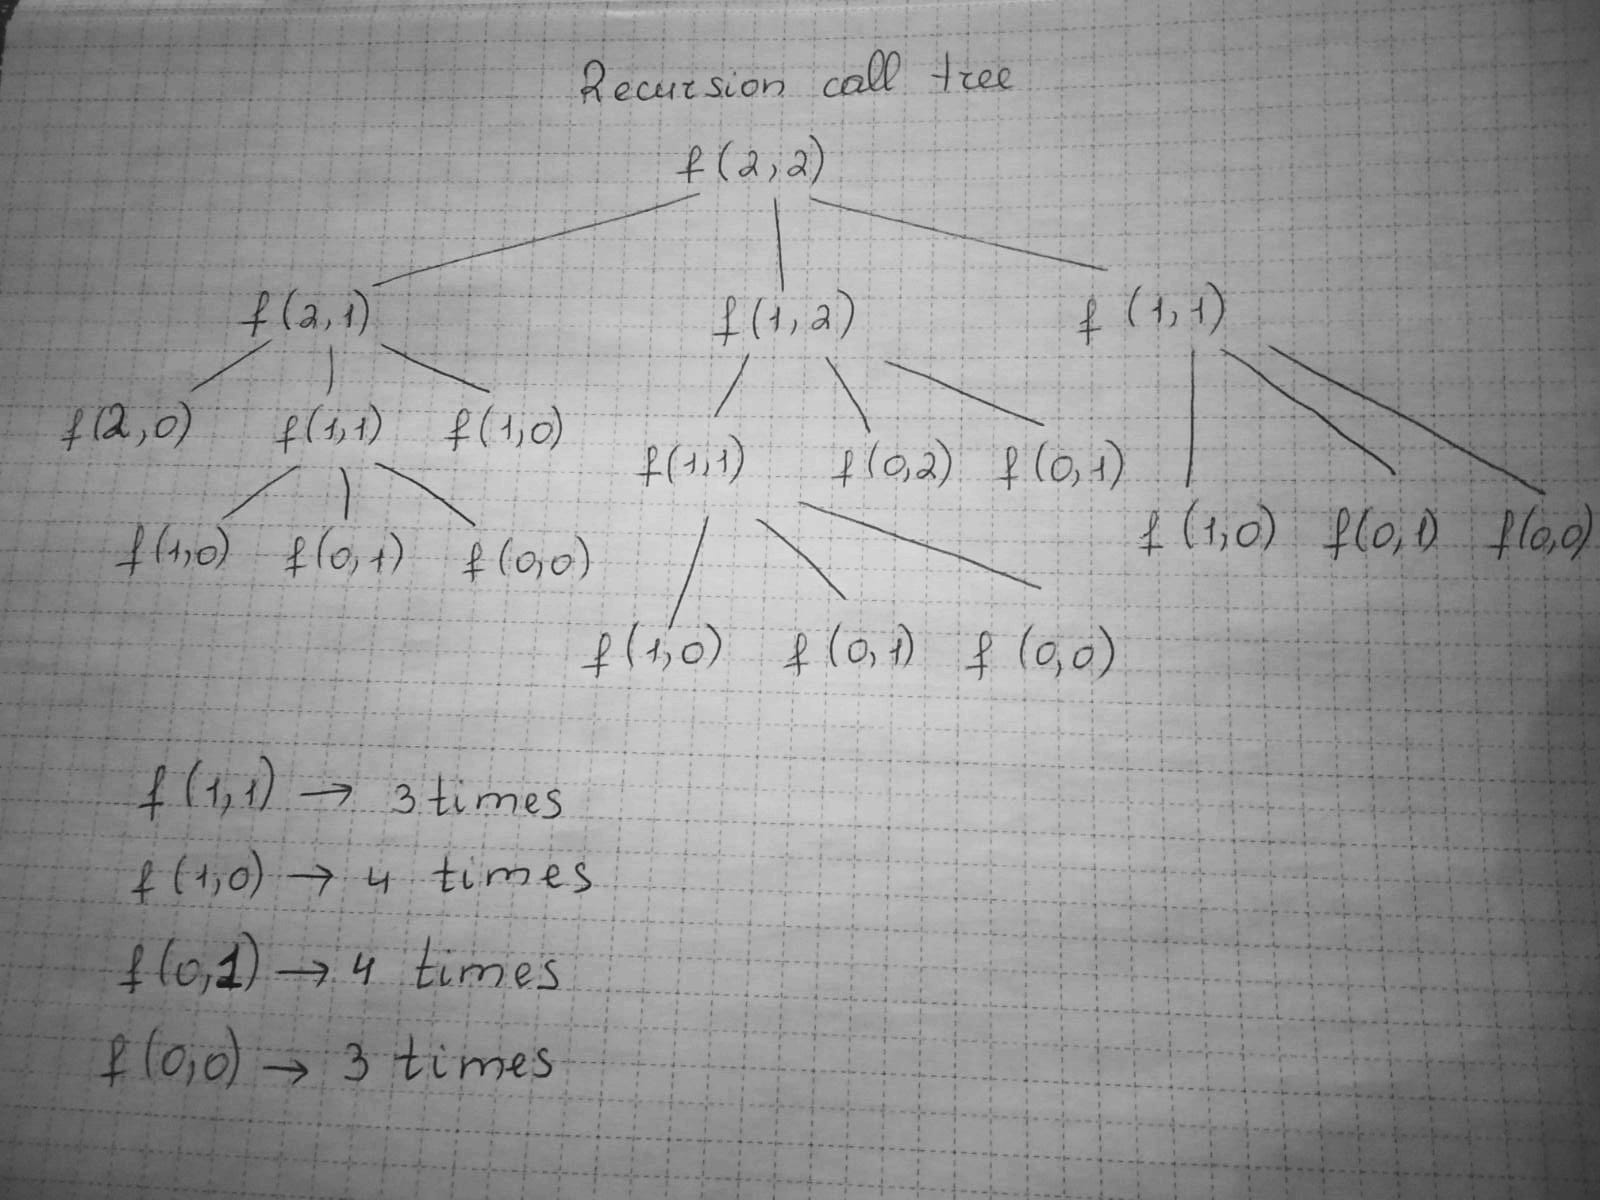

        - if we write recursion tree as a matrix:
         __                       __
        |   f(0,0)  f(0,1)  f(0,2)  |
        |                           |
        |   f(1,0)  f(1,1)  f(1,2)  |
        |                           |
        |   f(2,0)  f(2,1)  f(2,2)  |
        |__                       __|
        
        We can see that from the recursion tree:
        
            f(1,1) = f(0,0) + f(0,1) + f(1,0)
            f(1,2) = f(0,1) + f(0,2) + f(1,1)
            f(2,1) = f(1,0) + f(1,1) + f(2,0)
            f(2,2) = f(1,1) + f(1,2) + f(2,1)
         
        So, we can say that : matrix[i,j] = matrix[i - 1, j - 1] + matrix[i - 1, j] + matrix[i, j - 1]
        If we create the DP table buttom-up:
        

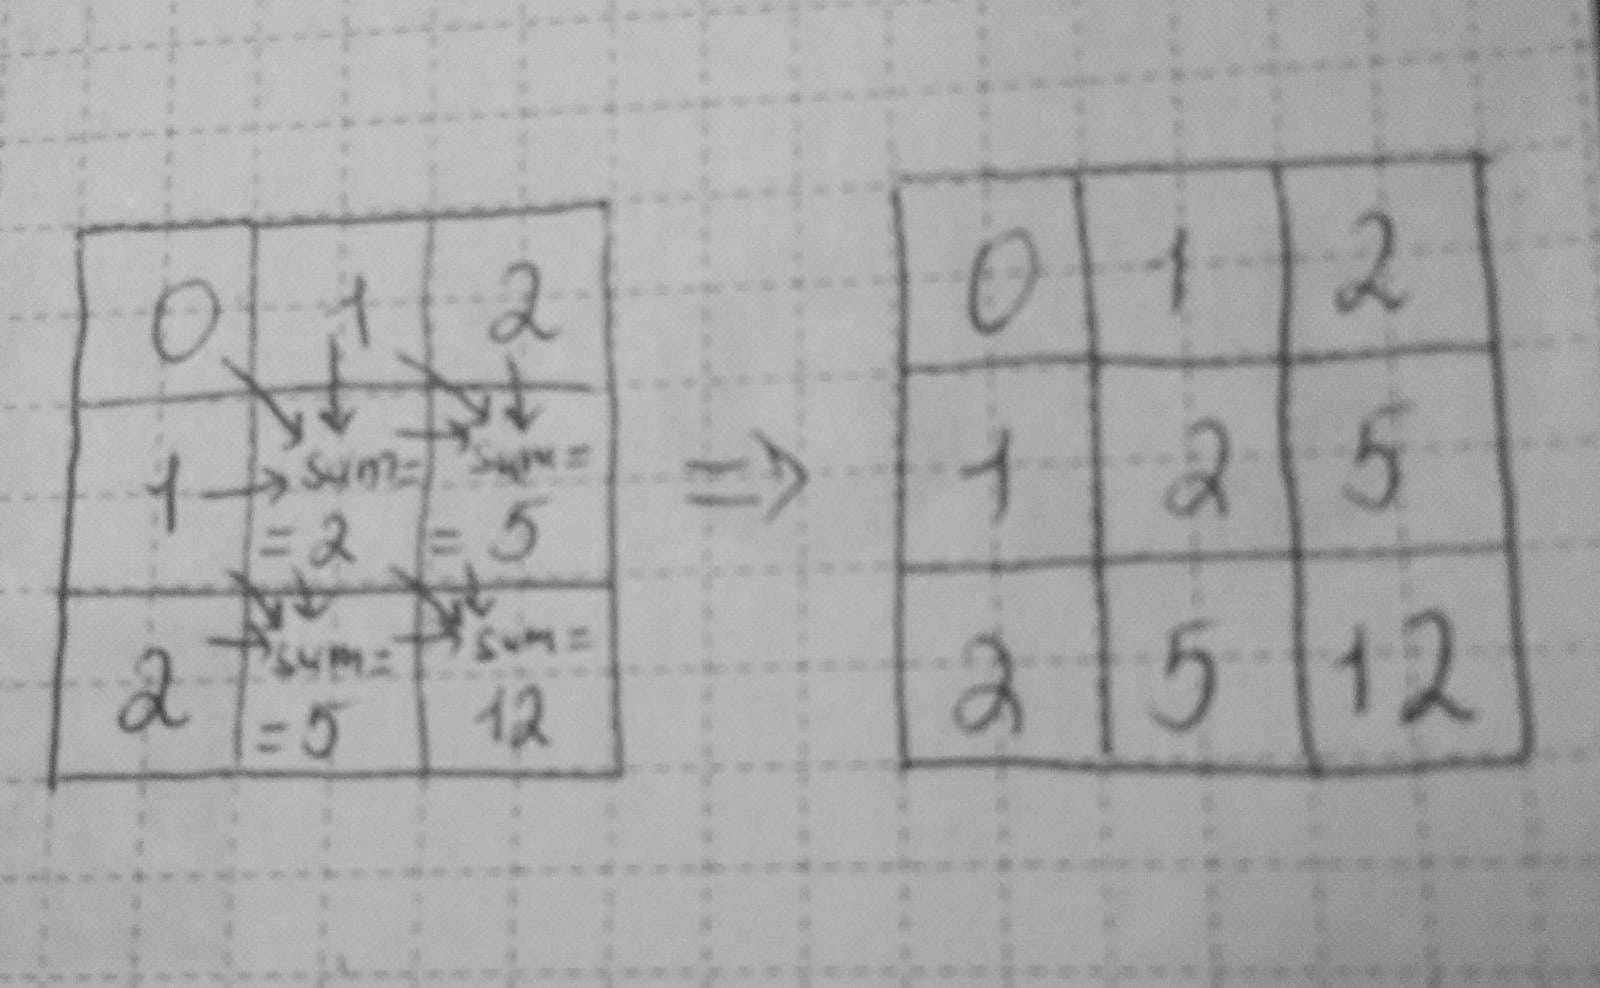

        - Here, we just draw a table(size(aXb)), and fill first column and first row with lenght of a and b starting from 0. Then calculate the each cell in the table. 
        - As we solved (a + 1) * (b + 1) subproblems then time complexity for  DP solution will be O((a + 1) * (b + 1)).
        - Initial recursive implementation in the tree is f(1,1), to solve it we need to solve 3 subproblems so, its complexity is O(a + 1).

**EX 3.**

Implement edit distance with following operations (insertion, deletion, substitution, transposition) calculation procedure.

Costs:


1. Insertion 1
2. Deletion 1
3. Transposition 1 (switching 2 characters next to each other, ab <->ba).
4. Substitution costs (substituting one character with other): t<->d = 0.5, k<->g = 0.5, b<->p = 0.5. Everyhing else is 1.

Demonstrate with a few examples that your code works as intended. Confirm at least one result by hand.

Questions: What is the time and memory complexity of Edit Distance algorithm (consider that you want to reconstruct the sequence of operations)?

         -Here, we try to find the Levenshtein distance(edit distance), and we need four operations:
            1. inertion
            2. deletion
            3. transposition
            4. Substitution costs
         -We will use DP table to find the result. For example, if the elements(st1[i], str2[j]) of the strings are the same character we will take minimum of matrix[i, j], matrix[i + 1, j] and matrix[i, j + 1], and add 0 to minimum. Otherwise(they are not same) we will take minimum of matrix[i, j], matrix[i + 1, j] and matrix[i, j + 1], and add 1 to minimum, but we are some exception when we look at t<->d, k<->g and b<->p, then we will take minimum of matrix[i, j], matrix[i + 1, j] and matrix[i, j + 1], and add 0.5 to minimum. So, we will write the result to the cell(matrix[i + 1, j + 1]) in DP table. The last character(matrix[len(str1), len(str2)]) in the table will be edit distance between given two strings. The code to solve this provided below. While doing this homework I used this source https://www.youtube.com/watch?v=MiqoA-yF-0M .

In [32]:
import numpy as np

def edit_dist(str1, str2):
    
    edit_dis_mat = np.zeros([len(str1) + 1, len(str2) + 1])

    for i in range(len(str2) + 1):
        edit_dis_mat[0, i] = i

    for i in range(len(str1) + 1):
        edit_dis_mat[i, 0] = i

    for _ in range(len(str1)):

        for j in range(len(str2)):

            if str1[_] == str2[j]:

                  edit_dis_mat[_ + 1, j + 1] = edit_dis_mat[_, j]

            elif str1[_] != str2[j]:
                  if (str1[_].lower() == "t" and str2[j].lower() == "d") or (str1[_].lower() == "d" and str2[j].lower() == "t") or\
                     (str1[_].lower() == "k" and str2[j].lower() == "g") or (str1[_].lower() == "g" and str2[j].lower() == "k") or\
                     (str1[_].lower() == "b" and str2[j].lower() == "p") or (str1[_].lower() == "p" and str2[j].lower() == "b"):


                      edit_dis_mat[_ + 1, j + 1] = min(edit_dis_mat[_, j + 1], edit_dis_mat[_ + 1, j], edit_dis_mat[_, j]) + 0.5

                  else:

                      edit_dis_mat[_ + 1, j + 1] = min(edit_dis_mat[_, j + 1], edit_dis_mat[_ + 1, j], edit_dis_mat[_, j]) + 1

    edit_dist = edit_dis_mat[len(str1), len(str2)]  
    
    return "Edit distance between {} and {} is {}: DP TABLE: {}".format(str1, str2, edit_dist, edit_dis_mat)
    

print(edit_dist("RUSTAMOVA", "FARIDA"))


##############DP TABLE
   #    F    A    R    I    D    A
#  0.0  1.0  2.0  3.0  4.0  5.0  6.0
#R 1.0  1.0  2.0  2.0  3.0  4.0  5.0
#U 2.0  2.0  2.0  3.0  3.0  4.0  5.0
#S 3.0  3.0  3.0  3.0  4.0  4.0  5.0
#T 4.0  4.0  4.0  4.0  4.0  4.5  5.0
#A 5.0  5.0  4.0  5.0  5.0  5.0  4.5
#M 6.0  6.0  5.0  5.0  6.0  6.0  5.5
#O 7.0  7.0  6.0  6.0  6.0  7.0  7.5
#V 8.0  8.0  7.0  7.0  7.0  7.0  7.5
#A 9.0  9.0  8.0  8.0  8.0  8.0  7.0


Edit distance between RUSTAMOVA and FARIDA is 7.0: DP TABLE: [[0.  1.  2.  3.  4.  5.  6. ]
 [1.  1.  2.  2.  3.  4.  5. ]
 [2.  2.  2.  3.  3.  4.  5. ]
 [3.  3.  3.  3.  4.  4.  5. ]
 [4.  4.  4.  4.  4.  4.5 5. ]
 [5.  5.  4.  5.  5.  5.  4.5]
 [6.  6.  5.  5.  6.  6.  5.5]
 [7.  7.  6.  6.  6.  7.  6.5]
 [8.  8.  7.  7.  7.  7.  7.5]
 [9.  9.  8.  8.  8.  8.  7. ]]


        -Here,if we say that m = length(str1) + 1, and n = length(str2) + 1, then we solve n*m subproblems to find edit distance between given teo strings. So, time complexity will be O(m*n), and to store this problem we need n*m space. So, the memory complexity will be O(m*n).

**EX 4.**

Implement the Dynamic Time Warping algorithm and compare the following 6 sequences:

s1: 2 5 5 7 9 1 6 6 8 9 1 6 6 8 9 

s2: 1 1 1 1 3 3 3 3 1 1 1 1 7 7 8 7

s3: 4 2 1 4 8 8 9 3 2 3 2 2 6 9 2 1 1 6 1 

s4: 1 5 7 3 7 2 8 9 9 2 2 3 7 8 

s5: 3 2 2 1 1 8 3 2 6 9 1 6 1 

s6: 1 1 1 3 3 2 1 1 7 7 7

Calculate pairwise DTW distances between all 6 sequences, you should end up with 6x6 matrix, where matrix[i,j] is the distance between s_i and s_j.

Take the most similar pair of sequences (DTW result is minimum) and visualise the DTW calculation in some way. Draw lines, where data points between two sequences are aligned.



        - Here, to find the table[i,j] = abs(sequence1[i-1]-sequence2[j-1]) + min(table[i-1][j-1], table[i-1][j], table[i][j-1]).

**EX 5.**

Demonstrate the 1/0 knapsack problem on the following data (choosing the weight constraint as 11, maximizing the cost):

 Name Cost Weight

O1    1     1

O2    7     4

O3    14    7

O4    3     2

Explain what is a knapsack problem. Solve it using the dynamic programming approach. Draw the table and explain how it is filled. Show how to get the selected elements. Make an example of a practical problem that can be solved with this approach. What is the space complexity of this solution?

        - The knapsack problem is to determine how many of each item to include in a collection, given a set of objects with weights and values, so that the sum of the weights is as small as feasible and the sum of the values is as large as possible. To fill DP table:
        If we are filling any row we are looking at the given weight and fill it with the given cost. For each row weight 0 will be 0. Before the given weight, we fill previous weights with the same costs in previous row. If we have any row above we also add their weights to find costs of other weights. For example, for O1, weight is 1 and cost is 1. So starting from weight 1 in this row all the weights will be 1. 0 will be just 0 for all rows. For O2, weight is 4 and cost is 7. So weight 4 will be 7. Here, we can also look at above row, we can it to this weight (4+1) and cost (7+1). So, weight 5 in this row will be 8. All the weights in this row before weight 4, will be the same with previous row. After weight 5 all the weights will be the same with weight 5. So, we will get 18 in the end.        

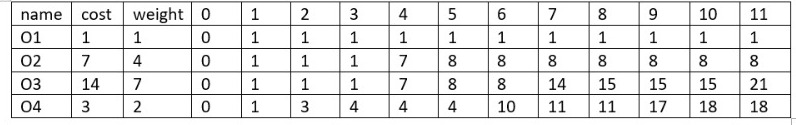

        - Now, we are looking at selected elements. For O4, cost is 18, and it is not in the previous rows. So, O4 is one of the selected element. For O3, cost is 18 - cost(O4) = 18- 3 = 15, and it is not in the previous rows. So, O3 is one of the selected element. For O2, cost is 15 - cost(O3) = 15 - 14 = 1, and it is also in the previous rows. So, O2 is not one of the selected element. For O1, cost is 1 - cost(O2) = 1 -1 = 0, and it is not in the previous rows. So, O1 is one of the selected element.
        -As a result, O1, O3 and O4 are selected elements. So, total weights is 1 + 7 + 2 = 10, and total cost is 1 + 14 + 3 = 18.

        -Space complexity for the knapsack problem using dynamic programming is O(N*W). Here, N is the number of items and W is the capacity of the knapsack.